#### Imports and Environment Setup

In [12]:
import numpy as np
import gymnasium as gym
import imageio
from gymnasium.utils import seeding
from IPython.display import Image, display

env = gym.make("Taxi-v3", render_mode='rgb_array')
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

#### Hyperparameters and Q-table Initialization

In [13]:
alpha = 0.1
gamma = 0.9
epsilon = 0.9
num_episodes = 2000
max_actions = 100

num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

#### Helper Functions

In [14]:
def update_q_table(q_table, state, action, reward, new_state, alpha, gamma):
    old_value = q_table[state, action]
    next_max = np.max(q_table[new_state])
    q_table[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

def epsilon_greedy(q_table, state, epsilon, action_space):
    if np.random.rand() < epsilon:
        return action_space.sample()
    return np.argmax(q_table[state, :])

def get_policy(q_table, num_states):
    return {state: np.argmax(q_table[state]) for state in range(num_states)}

#### Training

In [15]:
def train_q_learning(env, q_table, alpha, gamma, epsilon, num_episodes, max_actions):
    episode_returns = []
    for episode in range(num_episodes):
        state, info = env.reset(seed=42)
        terminated = False
        episode_reward = 0
        episode_action = 0

        while not (terminated):
            action = epsilon_greedy(q_table, state, epsilon, env.action_space)
            new_state, reward, terminated, truncated, info = env.step(action)
            update_q_table(q_table, state, action, reward, new_state, alpha, gamma)
            episode_reward += reward
            episode_action += 1
            state = new_state
            if episode_action >= max_actions:
                break
        episode_returns.append(episode_reward)
    return episode_returns

episode_returns = train_q_learning(env, q_table, alpha, gamma, epsilon, num_episodes, max_actions)
policy = get_policy(q_table, num_states)
print("Training complete!")

Training complete!


#### Evaluation and Visualization

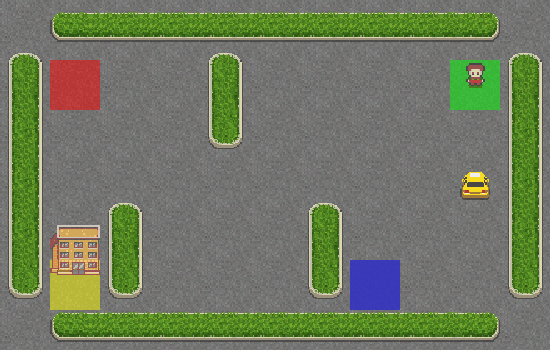

Total reward during evaluation: 8


In [16]:
def evaluate_policy(env, policy, max_actions, render=False):
    frames = []
    state, info = env.reset(seed=42)
    terminated = False
    episode_total_reward = 0
    episode_action = 0

    while not (terminated):
        action = policy[state]
        episode_action += 1
        new_state, reward, terminated, truncated, info = env.step(action)
        if render:
            frames.append(env.render())
        episode_total_reward += reward
        state = new_state
        if episode_action >= max_actions:
            break

    if render:
        imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5, loop=0)
        display(Image(filename='taxi_agent_behavior.gif'))

    return episode_total_reward

total_reward = evaluate_policy(env, policy, max_actions, True)
print(f"Total reward during evaluation: {total_reward}")